# Predict Future Stock Prices (Short-Term)

# Task
Analyze historical stock data using the yfinance library to predict the next day's closing price for a selected stock (e.g., Apple) using a Linear Regression or Random Forest model, and visualize the actual vs predicted closing prices.

## Fetch historical data

### Subtask:
Fetch historical stock data for a chosen stock (e.g., Apple) for a specific date range.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance

**Reasoning**:
Define the ticker symbol, start and end dates, and download the historical stock data using yfinance.



In [ ]:
ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-12-31'
stock_data = yfinance.download(ticker_symbol, start=start_date, end=end_date)
display(stock_data.head())

/tmp/ipython-input-3-3174883627.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yfinance.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


## Prepare the data

### Subtask:
Prepare the data for model training by creating features and the target variable, and handling any missing values.


**Reasoning**:
Prepare the data for model training by creating features and the target variable, and handling any missing values by creating the 'Next Day Close' column by shifting the 'Close' column and then dropping rows with missing values, and then defining the features and target variable.



In [ ]:
stock_data['Next Day Close'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)
X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Next Day Close']
display(stock_data.head())

Price,Close,High,Low,Open,Volume,Next Day Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400,71.914810
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800,72.487854
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,72.146950
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000,73.307503
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200,74.864616


## Split the data

### Subtask:
Divide the data into training and testing sets.


**Reasoning**:
Import the necessary function for splitting the data and then split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a regression model

### Subtask:
Choose and train a Linear Regression or Random Forest model on the training data.


**Reasoning**:
Import the LinearRegression model and train it on the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions

### Subtask:
Make predictions on the test data using the trained regression model.


**Reasoning**:
Use the trained Linear Regression model to make predictions on the test set features.



In [ ]:
y_pred = model.predict(X_test)

## Evaluate the model

### Subtask:
Calculate metrics to evaluate the performance of the model (e.g., Mean Squared Error, R-squared).


**Reasoning**:
Calculate and print the Mean Squared Error and R-squared score of the model's predictions.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7.257123822023599
R-squared: 0.9931853612462425


## Visualize actual vs predicted prices

### Subtask:
Plot the actual closing prices against the predicted closing prices for the test set to visually assess the model's performance.


**Reasoning**:
Create a scatter plot to visualize the actual vs predicted prices and add a line for perfect predictions to help assess the model's performance.



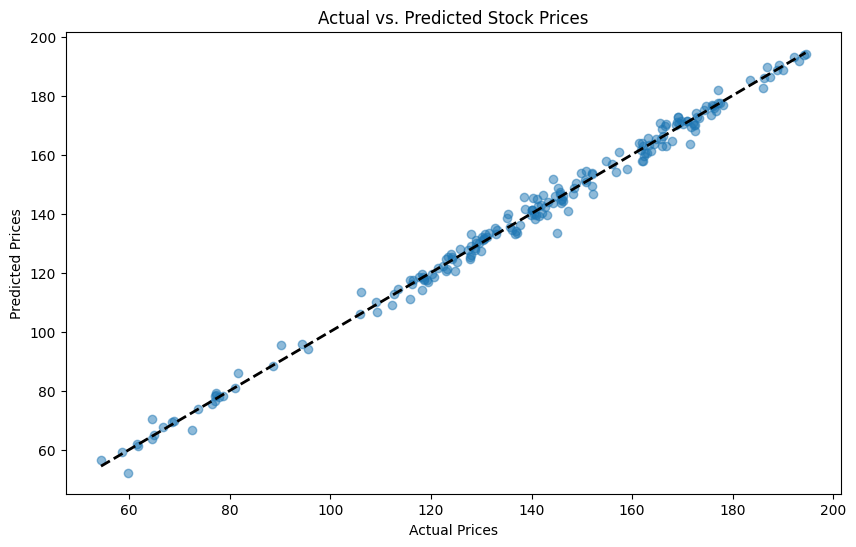

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Summary:

### Data Analysis Key Findings

*   Historical stock data for Apple (AAPL) from 2020-01-01 to 2023-12-31 was successfully fetched.
*   A 'Next Day Close' column was added to the data and rows with missing values were removed.
*   The data was split into training and testing sets with 80% for training and 20% for testing.
*   A Linear Regression model was trained on the training data.
*   Predictions were made on the test data using the trained Linear Regression model.
*   The model achieved a Mean Squared Error (MSE) of approximately 7.26 and an R-squared value of approximately 0.993 on the test data.
*   A scatter plot visualizing actual vs. predicted closing prices showed a strong positive correlation, indicating that the predicted prices are close to the actual prices.

### Insights or Next Steps

*   The Linear Regression model demonstrates strong performance in predicting the next day's closing price for AAPL based on the provided features. The high R-squared value suggests the model explains a significant portion of the variance.
*   Further investigation could involve exploring additional features, such as technical indicators or news sentiment, and evaluating other regression models like Random Forest to potentially improve prediction accuracy and robustness.
